1. Реализуйте 1 шаг градиентного спуска для сети с несколькими входами

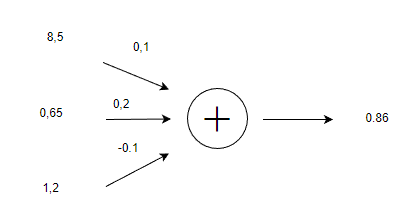

In [ ]:
import numpy as np
# Реализация математической модели нейрона
def neural_network(input,weights):
    assert(len(input) == len(weights))
    return np.dot(input, weights)


games =  [8.5, 9.5, 9.9, 9.0] # Среднее число игр, сыгранных каждым игроком в сезоне
wins= [0.65, 0.8, 0.8, 0.9] # Доля побед
nfans = [1.2, 1.3, 0.5, 1.0] # Число фанатов в тысячах
win_or_lose_binary = [1, 1, 0, 1] # Целевые значения выхода сети


target = win_or_lose_binary[0]
input = [games[0],wins[0],nfans[0]] # x - входные значения
weights = [0.1, 0.2, -.1]
new_weights = [] # Новый массив весов
learning_rate  = 0.01

#реализация 1 шага градиентного спуска
pred = neural_network(np.array(input),np.array(weights)) # Предсказание основанное на математической модели нейрона
error = (pred - target) ** 2 # Средне квадратическая ошибка
derivative = 2*(pred-target)*np.array(input) # Производная
new_weights= weights - learning_rate*np.array(derivative) # Новый вес

print('Prediction = ', pred )
print("Weights = " + str(weights))
print("Weight corrections = " + str(new_weights))
print('Error = ', error)
print('New prediction = ', neural_network(input, new_weights))
print('derivative =', derivative, '\n' )

Prediction =  0.8600000000000001
Weights = [0.1, 0.2, -0.1]
Weight corrections = [ 0.1238   0.20182 -0.09664]
Error =  0.01959999999999997
New prediction =  1.067515
derivative = [-2.38  -0.182 -0.336] 



2. Сделайте  несколько итераций градиентного спуска.Постройте графики error/weight. Отметьте на графиках как меняется соответсвующий вес в процессе обучения.

In [ ]:
import numpy as np

def w_sum(a,b):
    assert(len(a) == len(b))
    output = 0

    for i in range(len(a)):
        output += (a[i] * b[i])

    return output

weights = [0.1, 0.2, -.1]

weights_plot = [] # Для построения графиков
pred_ = []
error_ = []
weights_ = [np.array(weights)] # Массив скоректированных весов

def neural_network(input,weights):
    pred = w_sum(input,weights)
    return pred

games =  [8.5, 9.5, 9.9, 9.0] # Среднее число игр, сыгранных каждым игроком в сезоне
wins= [0.65, 0.8, 0.8, 0.9] # Доля побед
nfans = [1.2, 1.3, 0.5, 1.0] # Число фанатов в тысячах

win_or_lose_binary = [1, 1, 0, 1] # Целевые значения выхода сети

target = win_or_lose_binary[0]
input = [games[0],wins[0],nfans[0]]

learning_rate  = 0.01

def ele_mul(number,vector): # Умножение числа на вектор
  result = np.multiply(number,vector)
  return result

for i in range(3):
  pred = neural_network(np.array(input),np.array(weights_[i]))
  pred_.append(pred) # Добавляем элементы в массив предсказаний

  error = (pred - target) ** 2 # СКО
  error_.append(error) # Добавляем элементы в массив ошибки

  derivative = 2*(pred_[i]-target)*np.array(input) # Находим производную
  new_weights = weights_[i] - learning_rate*np.array(derivative) # Новый вес
  weights_.append(new_weights)
  weights_plot.append(new_weights)

  pred = neural_network(input,weights)
  error = (pred - target) ** 2
  print("Weights = ", str(weights_[i]))
  print("Weight corrections = ", str(weights_[i+1]))
  print("Error = ", str(error_[i]))

Weights =  [ 0.1  0.2 -0.1]
Weight corrections =  [ 0.1238   0.20182 -0.09664]
Error =  0.01959999999999997
Weights =  [ 0.1238   0.20182 -0.09664]
Weight corrections =  [ 0.11232245  0.2009423  -0.09826036]
Error =  0.004558275224999999
Weights =  [ 0.11232245  0.2009423  -0.09826036]
Weight corrections =  [ 0.1178575   0.20136557 -0.09747894]
Error =  0.0010600955625943344


Text(0.5, 1.0, 'Графики зависимости error/weight')

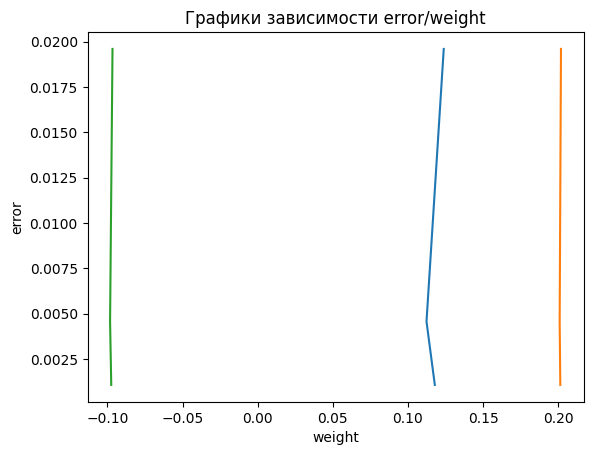

In [ ]:
import matplotlib.pyplot as plt

y = error_
x = np.transpose(weights_plot)
for i in range(3):
  plt.plot(x[i], y)
plt.xlabel(r'weight')
plt.ylabel(r'error')
plt.title(r'Графики зависимости error/weight')


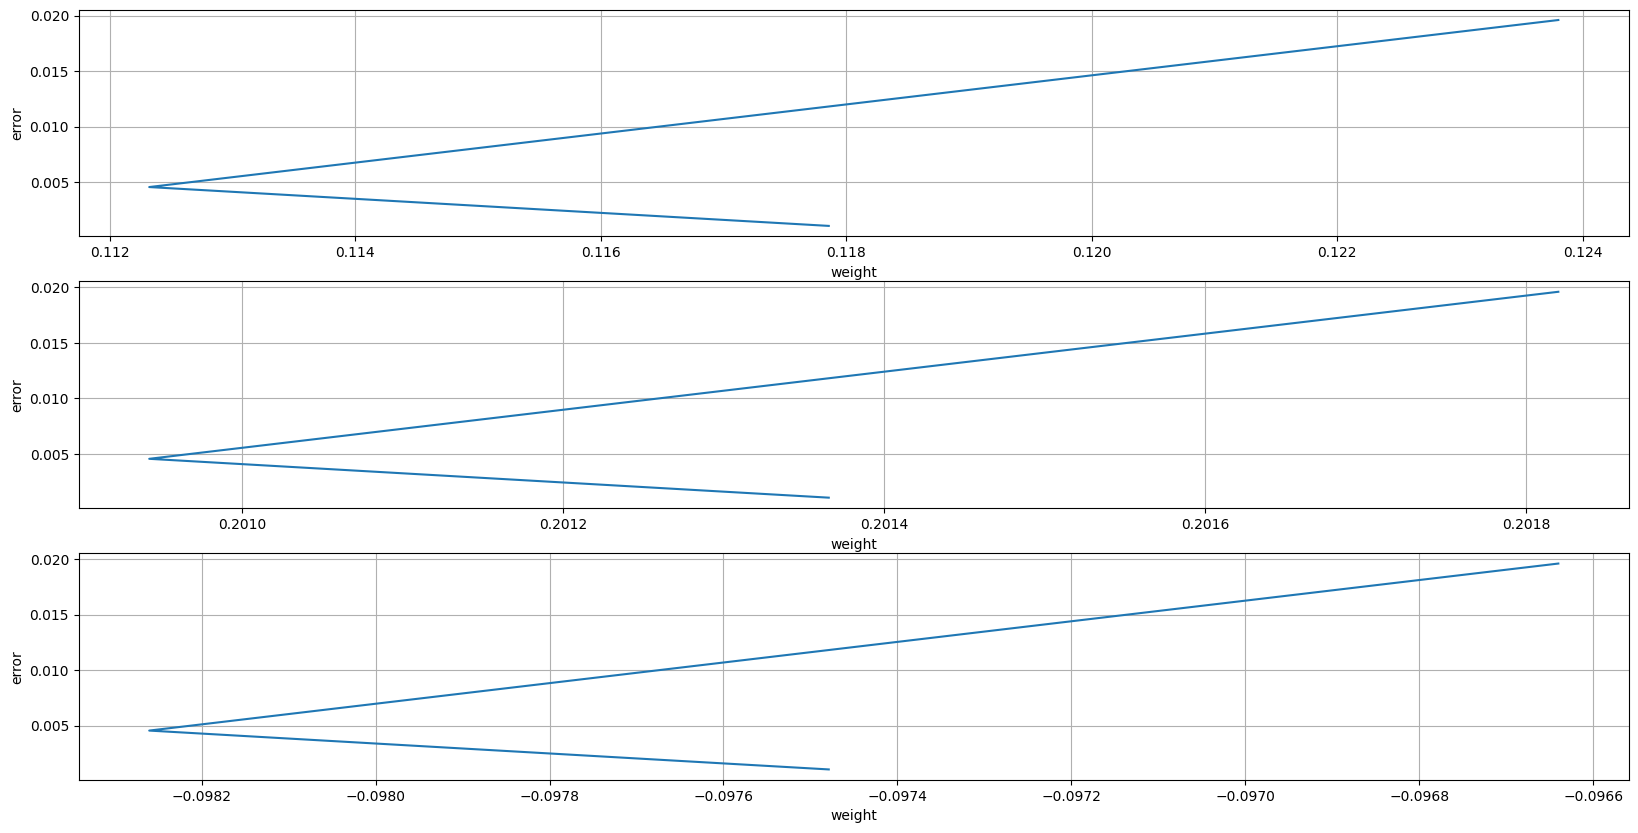

In [ ]:
plt.figure(figsize=(20, 10))
y = error_
x = np.transpose(weights_plot)
for i in range(3):
  plt.subplot(3,1,i+1)
  plt.plot(x[i], y)
  plt.grid(True)
  plt.xlabel(r'weight')
  plt.ylabel(r'error')